# OpenCV Image Processing 1
* Drawing diagrams
* Regoin of Interest (RoI)
* Color space
* Thresholding

In [67]:
import sys
import cv2
import numpy as np

print("python:", sys.version_info)
print("OpenCV:", cv2.__version__)
print("Numpy:", np.__version__)

python: sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)
OpenCV: 4.4.0
Numpy: 1.18.5


## Drawing diagrams

(-0.5, 499.5, 499.5, -0.5)

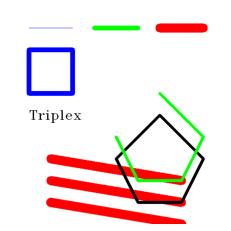

In [68]:
img = np.full((500,500,3), 255, dtype=np.uint8)
cv2.imwrite('./image/brank_500.jpg', img)

img = cv2.imread('./image/brank_500.jpg')

## lines
cv2.line(img, (50,50), (150,50), (255,0,0))
cv2.line(img, (200,50), (300,50), (0,255,0), 10)
cv2.line(img, (350,50), (450,50), (0,0,255), 20)

## lines with filter
cv2.line(img, (100,350), (400,400), (0,0,255), 20, cv2.LINE_4)
cv2.line(img, (100,400), (400,450), (0,0,255), 20, cv2.LINE_8)
cv2.line(img, (100,450), (400,500), (0,0,255), 20, cv2.LINE_AA)

## rectangle
cv2.rectangle(img, (50,100), (150,200), (255,0,0), 10)

## polylines
pts1 = np.array([[350,250],[450,350],[400,450],[300,450],[250,350]])
pts2 = np.copy(pts1)
pts2[:,1] -= 50
cv2.polylines(img, [pts1], True, (0,0,0), 5)
cv2.polylines(img, [pts2], False, (0,255,0), 5)

## text
cv2.putText(img, 'Triplex', (50, 260), cv2.FONT_HERSHEY_TRIPLEX, 1, (0,0,0))

## draw image for jupyter lab inline
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

## Region of Interest (RoI)

(-0.5, 2849.5, 1899.5, -0.5)

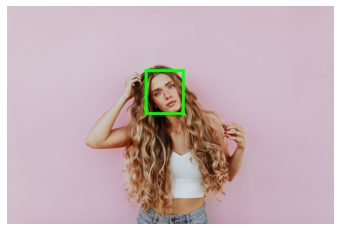

In [69]:
"""
import urllib.request
url = 'https://images.unsplash.com/photo-1500917293891-ef795e70e1f6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=2850&q=80'
filename = './image/woman.jpg'
urllib.request.urlretrieve(url, filename)
"""

img = cv2.imread('./image/woman.jpg')

## Region of Interest
x=1200; y=550; w=350; h=400
roi = img[y:y+h, x:x+w]

# print(roi.shape)
px = 50
cv2.rectangle(roi, (0,0), (w, h), (0,255,0), px)

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

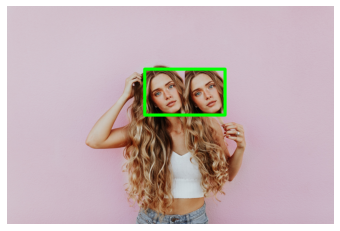

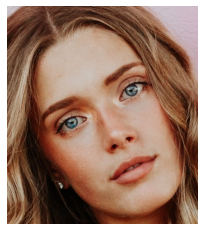

In [70]:
img = cv2.imread('./image/woman.jpg')

## Region of Interest
x=1200; y=550; w=350; h=400
roi = img[y:y+h, x:x+w]
img2 = roi.copy()
img[y:y+h, x+w:x+w+w] = roi
# print(roi.shape)
px = 25
cv2.rectangle(img, (x,y), (x+w+w,y+h), (0,255,0), px)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.figure(1)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Color space

default: (600, 487, 3) color: (600, 487, 3) unchanged: (600, 487, 4)


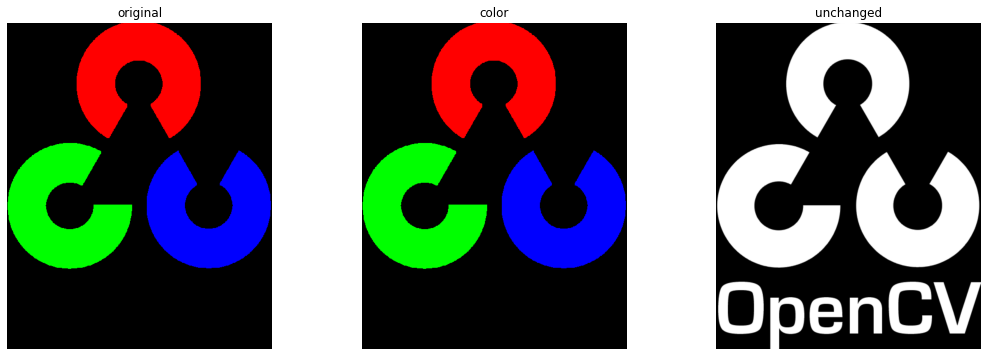

In [110]:
"""
import urllib.request
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/OpenCV_Logo_with_text.png/487px-OpenCV_Logo_with_text.png'
filename = './image/opencv_logo.png'
urllib.request.urlretrieve(url, filename)
"""

img = cv2.imread('./image/opencv_logo.png')
bgr = cv2.imread('./image/opencv_logo.png', cv2.IMREAD_COLOR)
bgra = cv2.imread('./image/opencv_logo.png', cv2.IMREAD_UNCHANGED)

print('default:', img.shape, 'color:', bgr.shape, 'unchanged:', bgra.shape)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18, 6))

imgs = {'original': img, 'color': bgr, 'unchanged': bgra}
for i, (key, value) in enumerate(imgs.items()):    
    plt.subplot(1,3,1+i)
    plt.title(key)
    if key == 'unchanged':
        plt.imshow(cv2.cvtColor(value[:,:,3], cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(cv2.cvtColor(value, cv2.COLOR_BGR2RGB))
    plt.axis('off')

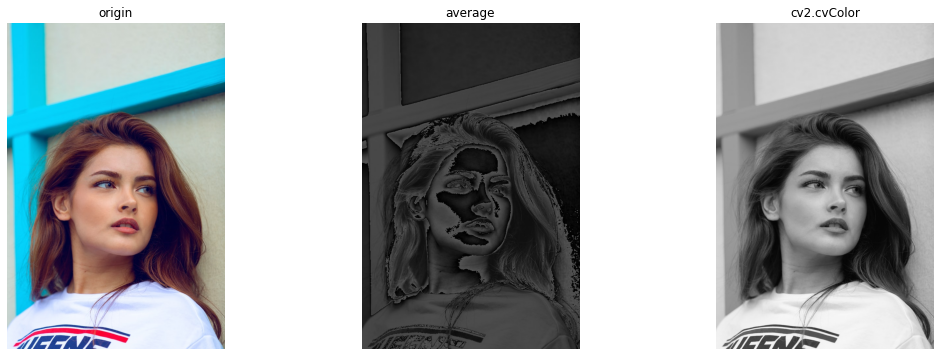

In [98]:
"""
import urllib.request
url = 'https://images.unsplash.com/photo-1529626455594-4ff0802cfb7e?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=668&q=80'
filename = './image/girl.jpg'
urllib.request.urlretrieve(url, filename)
"""

img = cv2.imread('./image/girl.jpg')
img2 = img.astype(np.uint16)
b, g, r = cv2.split(img)
gray1 = ((b+g+r)/3).astype(np.uint8)

gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18,6))

imgs = {'original': img, 'average': gray1, 'cv2.cvColor': gray2}
for i, (key, value) in enumerate(imgs.items()):    
    plt.subplot(1,3,1+i)
    plt.title(key)
    plt.imshow(cv2.cvtColor(value, cv2.COLOR_BGR2RGB))
    plt.axis('off')

# print([i for i in dir(cv2) if i.startswith('COLOR_')])

## Thresholding
* Thresholding
* Otsu's binarization method
* Adaptive threshold

127.0


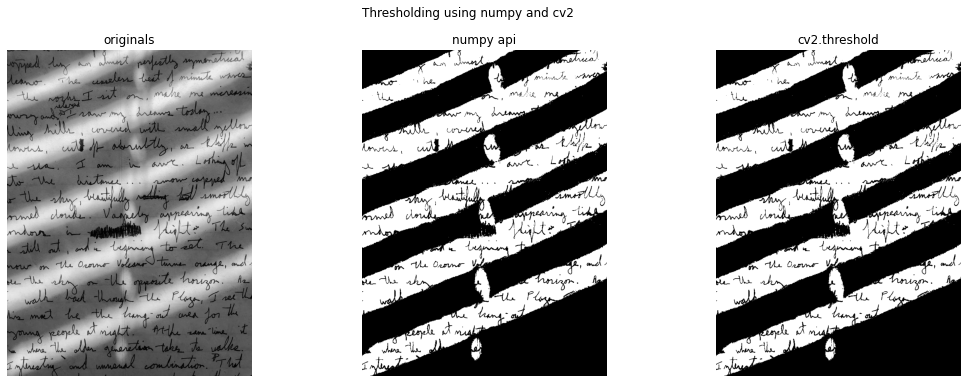

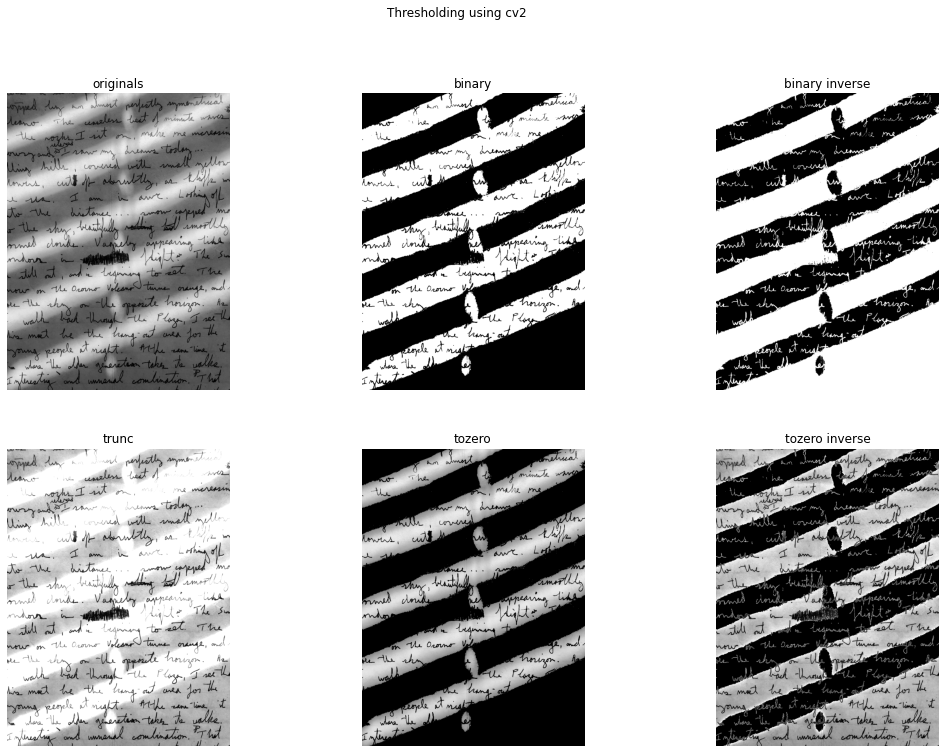

otsu-threshold: 139.0


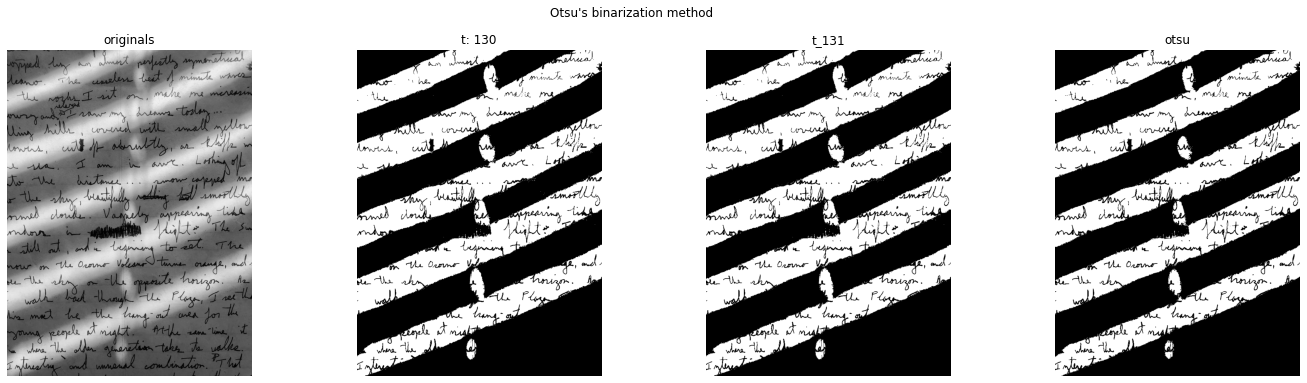

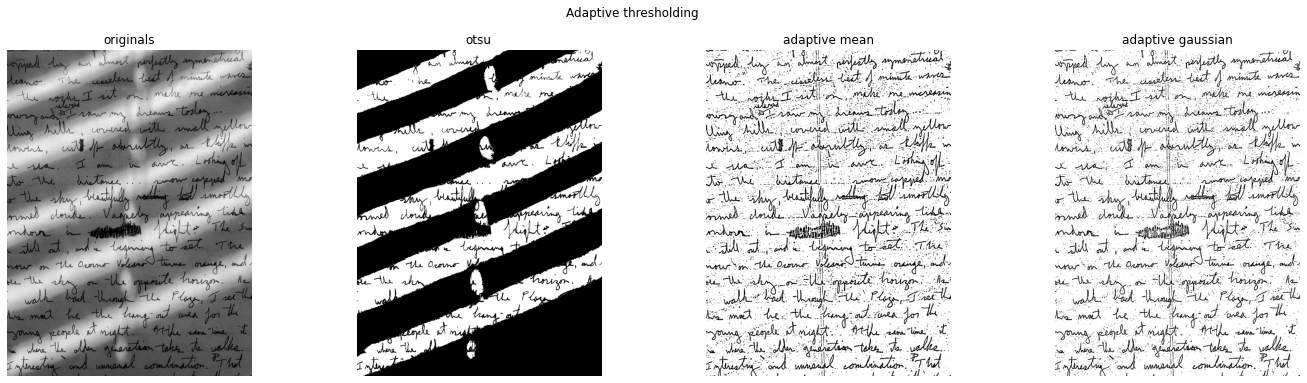

In [108]:
"""
url='https://images.unsplash.com/photo-1543769657-fcf1236421bc?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=750&q=80'
filename = './image/text.jpg'
urllib.request.urlretrieve(url, filename)
"""

img = cv2.imread('./image/text.jpg', cv2.IMREAD_GRAYSCALE)
thresh_np = np.zeros_like(img)
thresh_np[img>127] = 255
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
print(ret)

imgs = {'originals': img, 'numpy api': thresh_np, 'cv2.threshold': thresh_cv}
plt.figure(figsize=(18,6))
plt.suptitle('Thresholding using numpy and cv2')
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1,3,1+i)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.axis('off')
    
plt.show()

_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs = {'originals': img, 'binary': t_bin, 'binary inverse': t_bininv, \
       'trunc': t_truc, 'tozero': t_2zr, 'tozero inverse': t_2zrinv}

plt.figure(figsize=(18,12))
plt.suptitle('Thresholding using cv2')
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2,3,1+i)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.axis('off')

plt.show()

_, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)
_, t_131 = cv2.threshold(img, 131, 255, cv2.THRESH_BINARY)
t, t_otsu = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('otsu-threshold:', t)

imgs = {'originals': img, 't: 130': t_130, 't_131': t_131, 'otsu': t_otsu}

plt.figure(figsize=(24,6))
plt.suptitle("Otsu's binarization method")
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1,4,1+i)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.axis('off')

plt.show()


block_size = 9
C = 5

_, t_otsu = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
t_mean = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                             cv2.THRESH_BINARY, block_size, C)
t_gau = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                             cv2.THRESH_BINARY, block_size, C)

imgs = {'originals': img, 'otsu': t_otsu, 'adaptive mean': t_mean, 'adaptive gaussian': t_gau}

plt.figure(figsize=(24,6))
plt.suptitle("Adaptive thresholding")
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1,4,1+i)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.axis('off')

plt.show()
